# <span style="color:seagreen"> Модуль 2 </span>
*Семинар 7-9 марта 2023*

## Темы:
+ Различия между параметрическими и непараметрическими статистическими критериями
+ Тест на нормальность распределения
+ Т-тест Стьюдента и тест Манна-Уитни-Вилкоксона
+ Дисперсионный анализ (ANOVA)
+ Непараметрические аналоги ANOVA

## <span style="color:darkgreen"> Применение Т-теста Стьюдента на нормально распределенных данных, независимые и зависимые выборки </span>

Если нам нужно сравнить два распределения и выявить их сходство или различие, есть две характеристики, которые мы, в первую очередь, можем проанализировать:
+ среднее (mean);
+ дисперсия (variance).

<p>Ниже сгенерируем данные из нормального распределения, чтобы отразить суть проблемы.</p>
<p>Вспомним формулу плотности вероятноти для нормального распределения, она нам понадобится:</p>
$$f(x) = {{1 \over \sigma \sqrt{2 \pi}} e {- {1 \over 2} ( {x-\mu \over \sigma} )^2}}$$

In [32]:
import numpy as np

# установим seed
np.random.seed(999)

# Сгенерируем данные для двух нормальных распределений
# мат.ожидание, дисперсия, размер выборки для первого распределения, а также размер выборки
mu1, sigma1, n1 = 0, 1, 100000 
# мат.ожидание и дисперсия для второго распределения, а также размер выборки
mu2, sigma2, n2 = 3, 5, 100000
N1 = np.random.normal(mu1, sigma1, n1)
N2 = np.random.normal(mu2, sigma2, n2)

Проверим, что среднее и дисперсия действительно совпадают с заданными (точность будет тем выше, чем больше размер выборки):

In [36]:
# Разница между мат.ожиданием и реальным средним для 1-го распределения
abs(mu1 - np.mean(N1))

0.0015691728480847567

In [37]:
# Разница между мат.ожиданием и реальным средним для 2-го распределения
abs(mu2 - np.mean(N2))

0.017174201315161675

In [38]:
# Разница между дисперсией и отклонением для 1-го распределения:
abs(sigma1 - np.std(N1))

0.0020158081535766037

Построим график $f(x)$ совместно с полученными выборками:

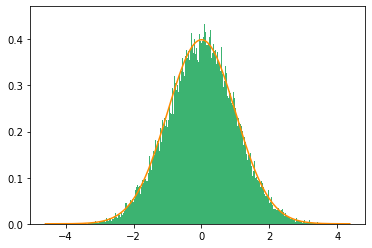

In [39]:
import matplotlib.pyplot as plt
counts1, bins1, ignored1 = plt.hist(N1, 1000, density = True, color="mediumseagreen") # Гистограмма для 1-го набора данных
plt.plot(bins1, 1/(sigma1*np.sqrt(2*np.pi))*
         np.exp(-(bins1 - mu1)**2/(2*sigma1**2)),
        linewidth = 1.5, color = 'darkorange')
plt.show()

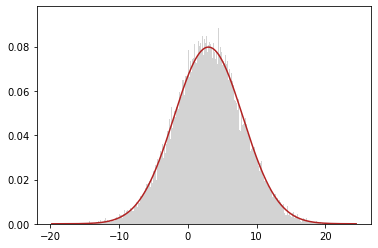

In [40]:
# Сделаем то же самое для второго набора данных
counts2, bins2, ignored2 = plt.hist(N2, 1000, density = True, 
                                 color="darkgray",
                                 alpha=0.5) # Гистограмма для 2-го набора данных
plt.plot(bins2, 1/(sigma2*np.sqrt(2*np.pi))*
         np.exp(-(bins2 - mu2)**2/(2*sigma2**2)),
        linewidth = 1.5, color = 'firebrick')
plt.show()

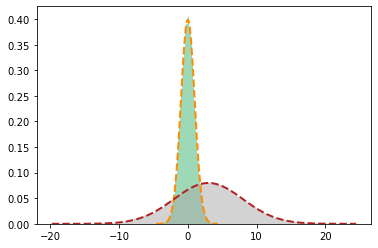

In [42]:
# Отобразим все распределения и наборы данных на одном графике
counts1, bins1, ignored1 = plt.hist(N1, 
                                 100, 
                                 density = True, 
                                 color="mediumseagreen",
                                 alpha=0.5) # Гистограмма для 1-го набора данных
counts2, bins2, ignored2 = plt.hist(N2, 
                                 100, 
                                 density = True, 
                                 color="darkgray",
                                 alpha=0.5) # Гистограмма для 2-го набора данных
plt.plot(bins1, 1/(sigma1*np.sqrt(2*np.pi))*
         np.exp(-(bins1 - mu1)**2/(2*sigma1**2)), "--",
        linewidth = 2, color = 'darkorange') # Функция плотности распределения для N(1)
plt.plot(bins2, 1/(sigma2*np.sqrt(2*np.pi))*
         np.exp(-(bins2 - mu2)**2/(2*sigma2**2)), "--",
        linewidth = 2, color = 'firebrick') # Функция плотности распределения для N(2)
plt.show()

<p>Таким образом, если случайная величина имеет нормальное распределение (то есть мы считаем, что она имеет нормальное распределение), то нас интересует "положение" среднего значения и "ширина" распределения.</p>
<p>Если популяционная дисперсия нам не известна, мы будем использовать ее оценку — стандартное отклонение. Разумеется, это будет неидеальное значение, некоторое приближение.</p>
<p>Таким образом, мы будем использовать не нормальное распределение (z-распределение), а t-распредедление с несколькими степенями свободы.</p>

### <span style="color:green"> Задача 1 </span>
Допустим, мы хотим сравнить, есть ли разница в росте между мужчинами и женщинами. 
* выборка мужчин: $μ_1$, $σ_1=4.1, n_1=30$
* выборка женщин: $μ_2$, $σ_2=3.3, n_2=30$

<p> Важно понимать, что случайные величины, порождающие выборки, независимы. В случае мужчин и женщин это "само собой разумеется", но в других случаях очень важно в этом удостовериться.</p>

Наша гипотеза выглядит так:
+ нулевая гипотеза $H_0: μ_1 = μ_2$ 
+ альтернативная гипотеза $H_1: μ_1 ≠ μ_1$

Если мы возьмем некоторую выборку мужчин и женщин, то сможем определить выборочные средние, обозначим их как $x_1$ и $x_2$. Тогда 
$x_1 - x_2 = d$ — это оценка для величины $μ_1 = μ_2$.

Если мы возьмем выборки мужчин и женщин несколько раз (например, 10 раз) и посчитаем $x_1$ и $x_2$, и далее d, 10 раз. 

Напомним, что стандартное отклонение для среднего: $sd \over \sqrt{n}$. 

Cтандартное отклонение для разницы средних для двух независимых выборок:
$$\sqrt{sd_1^2/n_1 + (sd_2^2/n_2)}$$ в нашем случае это стандартное отклонение для оценки $d$. 

Так как мы пользуемся t-распределением, то интервал для оценки $d$ определяется как:
$$d \pm t_{\alpha/2}\sqrt{sd_1^2/n_1 + sd_2^2/n_2}$$

In [45]:
# посчитаем степени свободы при заданных параметрах
import math 
from scipy.stats import t

# мужчины
sd1=4.1
n1=30
# женщины
sd2=3.3
n2=30

# число степеней свободы вычислим по формуле:
df = n1+n2-2
df

58

[Чтобы найти критическое значение t-распределения, можно использовать таблицу](http://dmo.econ.msu.ru/teaching/ru/stat/Student.htm) или же воспользоваться функцией:

In [57]:
from scipy.stats import t
t.ppf(q=0.025, df=n1+n2-2)

-2.0017174830120927

Итак, выпишем все, что нам известно, в таблицу

|                   | Мужчины| Женщины |
| :---------------- |:------:| :------:|
| Размер выборки, n |30|30|
| σ (известны)|4.1|3.3|
| Степени свободы df|28|
| α (уровень значимости)|0.05|
| t значение (для α/2) |$\pm$2,002|

In [58]:
# посчитаем ошибку
t_half_alpha=t.ppf(q=0.025, df=n1+n2-2)
margin_of_error = round(t_half_alpha*np.sqrt((sd1**2/n1)+(sd2**2/n2)), 3)
margin_of_error

-1.923

Изобразим то, что у нас *может получиться случайно*, на графике:

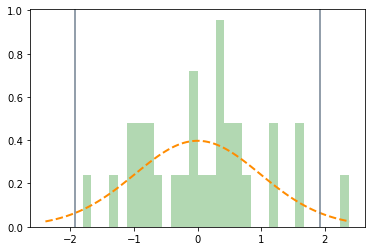

In [49]:
from scipy.stats import t
#mean, var, skew, kurt = t.stats(df, moments="mvsk")
values = t.rvs(df, size=30, random_state=np.random.RandomState(seed=111))
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
counts, bins, ignored = plt.hist(values, bins=30, density=True, alpha=0.3, 
        color = 'green')
plt.plot(x, t.pdf(x, df), "--",
        linewidth = 2, color = 'darkorange') 
plt.axvline(x=margin_of_error, color = "slategray")
plt.axvline(x=-margin_of_error, color = "slategray")
plt.show()

Мы ожидаем, что 95% значений $d$ будут располагаться между двумя значениями ошибки $\pm 1.969$ (95% доверительный интервал) ($t_{\alpha/2}=2.049$, 0.025% с каждой стороны).  

|                   | Мужчины| Женщины |
| :---------------- |:------:| :------:|
| Размер выборки, n |30|30|
| σ (известны)|4.1|3.3|
| выборочное среднее |176|164|
| Степени свободы df|28|
| α (уровень значимости)|0.05|
| t значение (для α/2) |$\pm$2,002|

Таким образом, мы можем посчитать 95% доверительный интервал для $d$:

In [51]:
# верхняя граница 95% доверительного интервала:
ul = 176-164 + abs(margin_of_error)
# нижняя граница 95% доверительного интервала:
ll = 176-164 - abs(margin_of_error)
ll, ul

(10.077, 13.923)

Доверительный интервал сильно смещен и не содержит нуля, что говорит о том, что в результатах измерения роста мужчин и женщин есть статистически значимые различия. 
<p>Проведем t-тест с помощью библиотеки python scipy.stats.</p>

In [54]:
from scipy import stats
sample1 = np.random.normal(176, 4.1, 30)
sample2 = np.random.normal(164, 3.3, 30)

Понятно, что данные распределены нормально, но в качестве возможной проверки можем использовать критерий Шапиро — Уилка

In [55]:
W_statistic, w_p_val = stats.shapiro(sample1-sample2)

# результат
print('W-statistic:', round(W_statistic, 3))
print('p-value:', round(w_p_val, 3))
if round(w_p_val, 3)>=0.05:
    print("Выборочное распределение подчиняется нормальному закону")
else:
    print("Выборочное распределение не подчиняется нормальному закону")

W-statistic: 0.981
p-value: 0.859
Выборочное распределение подчиняется нормальному закону


In [59]:
t_statistic, p_val = stats.ttest_ind(sample1, sample2)

# результат
print('t-statistic:', round(t_statistic, 3))
print('p-value:', round(p_val, 3))
if round(p_val, 3)<0.05:
    print("Измерения роста мужчин и женщин показывают статистически значимое различие")

t-statistic: 10.83
p-value: 0.0
Измерения роста мужчин и женщин показывают статистически значимое различие


### <span style="color:green"> Задача 2 </span>
Допустим, мы хотим узнать, насколько эффективно группа людей потеряла вес на определенной диете (классический пример).
Для этого взяли группу из 30 добровольцев, которые в течение некоторого времени придерживались одной и той же диеты. В начале и в конце временного промежутка измерили вес добровольцев. Получились следующие данные: 

In [60]:
weights_before = np.random.normal(80, 1.5, 30)
weights_after = np.random.normal(78, 2.9, 30)
diff = weights_after - weights_before
weights_before = [round(x, 2) for x in list(weights_before)]
weights_after = [round(x, 2) for x in list(weights_after)]
diff = [round(x, 2) for x in list(diff)]

Чтобы проверить, есть ли различия между выборками, можно использовать t-тест для повторных наблюдений ("repeated measures" t-тест):

In [62]:
import pandas as pd
pd.DataFrame({'Субъект': list(np.arange(1, 30+1, 1)),
              'Масса тела (День 1), кг': weights_before,
              'Масса тела (День 14), кг': weights_after,
              'Разница, кг': diff, 
              'Среднее разницы, кг': [round(np.mean(diff), 3)]+[""]*29,
              'Стандартное отклонение разницы, кг': [round(np.std(diff), 3)]+[""]*29})                          

,Субъект,"Масса тела (День 1), кг","Масса тела (День 14), кг","Разница, кг","Среднее разницы, кг","Стандартное отклонение разницы, кг"
0,1,80.74,72.16,-8.58,-2.357,3.725
1,2,81.45,78.48,-2.96,,
2,3,81.00,76.52,-4.48,,
3,4,79.18,78.82,-0.36,,
4,5,81.45,78.92,-2.53,,
5,6,81.15,81.32,0.17,,
6,7,80.93,79.99,-0.95,,
7,8,80.35,77.95,-2.41,,
8,9,81.49,82.93,1.43,,
9,10,79.83,79.42,-0.41,,


Стандартное отклонение: $sd_{d}/\sqrt{n}$, 

Статистика для парного t-теста:
$$t = {(d - mean_{d}) \over sd_{d}/\sqrt{n}}$$
$$df = n-1 $$
Доверительный интервал:
$$d \pm t_{\alpha/2}{sd_{d}\over \sqrt{n}}$$

Иначе говоря, если среднее значение разниц в весе будет больше 1.06 кг, то мы сможем отвергнуть нулевую гипотезу об отсутствии статистически значимых различий. 

In [64]:
# вычислим ошибку и доверительный интервал
from scipy.stats import t
sd = round(np.std(diff), 3)
t_half_alpha=t.ppf(q=0.05, df=30 - 1)
margin_of_error = round((t_half_alpha*sd/np.sqrt(30)), 2)

# результат
print('Ошибка', round(margin_of_error, 3))
print('t-критическое', round(t_half_alpha, 3))

Ошибка -1.16
t-критическое -1.699


In [70]:
# таким образом, границы доверительного интервала:
ul = np.mean(diff)+(margin_of_error*t_half_alpha)
ll = np.mean(diff)-(margin_of_error*t_half_alpha)
print('Границы 95% доверительного интервала:', round(ll, 3), ", ",  round(ul, 3))

Границы 95% доверительного интервала: -4.328 ,  -0.386


In [71]:
t = (np.mean(diff) - 0)/(np.std(diff)/np.sqrt(30))
print('Значение t-статистики:', round(t, 3))

Значение t-статистики: -3.466


Доверительный интервал не содержит 0, а значение t-статистики находится левее критического значения.

In [73]:
# сделаем то же самое с помощью 
t_statistic, p_val = stats.ttest_rel(weights_before, weights_after)

# результат
print('t-statistic:', round(t_statistic, 3))
print('p-value:', round(p_val, 3))
if round(p_val, 3)<0.05:
    print("Различие статистически значимо")

t-statistic: 3.407
p-value: 0.002
Различие статистически значимо


## <span style="color:darkgreen"> Применение аналогов Т-теста Стьюдента на данных, распределенных не по нормальному закону, независимые выборки  </span>

### <span style="color:green"> Задача 3 </span>
Допустим, наши данные распределены не по нормальному закону, а иначе.

In [74]:
from scipy.stats import vonmises
import matplotlib.pyplot as plt

# Сгенерируем две выборки из распределения
kappa1 = 4
kappa2 = 5
sample1_vonmises = vonmises.rvs(kappa1, size=1000, random_state=np.random.RandomState(seed=101))
sample2_vonmises = vonmises.rvs(kappa2, size=1000, random_state=np.random.RandomState(seed=101))

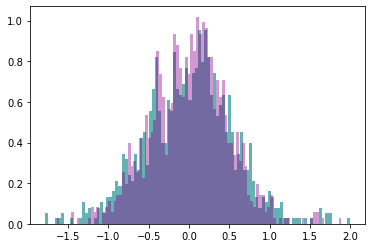

In [75]:
#Строим распределение
plt.hist(sample1_vonmises, bins=100, color="teal", density=True, alpha=0.6)
plt.hist(sample2_vonmises, bins=100, color="darkmagenta", density=True, alpha=0.4)
plt.show()

Визуально кажется, что данные распределены нормально, однако, если мы воспользуемся критерием Шапиро — Уилка, то получим: 

In [76]:
W_statistic, w_p_val = stats.shapiro(sample1_vonmises-sample2_vonmises)

# результат
print('W-statistic:', round(W_statistic, 3))
print('p-value:', round(w_p_val, 3))
if round(w_p_val, 3)>=0.05:
    print("Выборочное распределение подчиняется нормальному закону")
else:
    print("Выборочное распределение не подчиняется нормальному закону")

W-statistic: 0.787
p-value: 0.0
Выборочное распределение не подчиняется нормальному закону


Выборки порождены разными случайными величинами, то есть они независимы. Поэтому используем непараметрический U-критерий Манна — Уитни (для двух независимых выборок).

In [85]:
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(sample1, sample2)

# Результаты
print('statistic:', round(statistic, 3))
print('p-value:', p_value)
if p_value<0.05:
    print ("Различие статистически значимо")
else:
    print("Различие статистически не значимо")

statistic: 877.0
p-value: 2.8715847742981156e-10
Различие статистически значимо


In [86]:
import scipy.stats as ss
sample1_ranks = ss.rankdata(sample1)
sample2_ranks = ss.rankdata(sample2)

R1=sum(sample1_ranks)
R2=sum(sample2_ranks)

N1=len(sample1)
N2=len(sample2)

U1 = N1*N2 + N1*(N1+1)/2 - R1
U2 = N1*N2 + N2*(N2+1)/2 - R2

U = min([U1, U2])

Z = (U - N1*N2/2)/ np.sqrt(N1*N2*(N1+N2+1)/(N1))
U, Z

(900.0, 10.519303099774149)

## <span style="color:darkgreen"> ANOVA </span>

### <span style="color:green"> Задача 4 </span>
Все это время мы сравнивали две популяции, но что если мы хотим сравнить большее количество популяций, чтобы увидеть, есть ли между ними какое-либо различие.

Какие вопросы можно задать? Например, если у каждой популяции известно среднее, нас может интересовать: 
* все эти средние "порождены" одной и той же популяцией? 
* или же одно из средних отличается достаточно сильно от других, и, таким образом, вероятно, "пришло" из другой популяции? 

Для анализа можно воспользоваться ANOVA (analysis of variance).

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import vonmises
import pandas as pd

# Сгенерируем пять выборок из пяти распределений с заданными параметрами
np.random.seed(101)
Obs = 100 # Observations, Число наблюдений
Groups = 5 # Число групп / Columns
sd = 5
mu = 0
mu_1, sigma_1 = mu, sd
mu_2, sigma_2 = mu+5, sd
mu_3, sigma_3 = mu-10, sd
mu_4, sigma_4 = mu+10, sd
mu_5, sigma_5 = mu-99, sd
sample_1 = np.random.normal(mu_1, sigma_1, Obs).round(4)
sample_2 = np.random.normal(mu_2, sigma_2, Obs).round(4)
sample_3 = np.random.normal(mu_3, sigma_3, Obs).round(4)
sample_4 = np.random.normal(mu_4, sigma_4, Obs).round(4)
sample_5 = np.random.normal(mu_5, sigma_5, Obs).round(4)

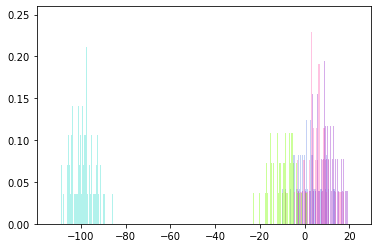

In [88]:
plt.hist(sample_1, bins=100, color="royalblue", density=True, alpha=0.3)
plt.hist(sample_2, bins=100, color="hotpink", density=True, alpha=0.4)
plt.hist(sample_3, bins=100, color="chartreuse", density=True, alpha=0.4)
plt.hist(sample_4, bins=100, color="darkorchid", density=True, alpha=0.4)
plt.hist(sample_5, bins=100, color="turquoise", density=True, alpha=0.4)
plt.show()

In [91]:
anova_data = pd.DataFrame({'Группа 1':sample_1,
              'Группа 2':sample_2,
              'Группа 3':sample_3,
              'Группа 4':sample_4,
              'Группа 5':sample_5})
display(anova_data)

,Группа 1,Группа 2,Группа 3,Группа 4,Группа 5
0,13.5342,13.0339,-11.3976,2.8953,-88.5744
1,3.1407,-0.5785,-4.6864,11.6083,-100.4591
2,4.5398,-1.9269,-1.2399,15.0366,-93.0435
3,2.5191,-1.6483,-6.5223,11.6489,-97.2968
4,3.2556,5.2073,-9.2317,14.6026,-105.1703
...,...,...,...,...,...
95,5.1415,8.4420,-2.3812,10.3588,-96.0957
96,-9.8630,5.4076,-3.5489,3.5422,-100.3536
97,-4.3344,2.9240,-17.3916,15.0050,-109.6802
98,3.6039,5.2683,-8.9288,18.3451,-89.5393


In [92]:
# посчитаем все средние:
means = [np.mean(sample_1), 
         np.mean(sample_2),
         np.mean(sample_3),
         np.mean(sample_4),
         np.mean(sample_5)]
# посчитаем среднее средних
all_mean = np.mean(means)

В ANOVA общая сумма квадратов (SST Sum of Squares Total) складывается из двух сумм:
+ сумма квадратов выборочных дисперсий между группами (SSC, SS Columns/Groups)
+ сумма квадратов выборочных дисперсий внутри групп (SSE, SS Error) 

Напомним вычисление степеней свободы и ошибок (N - количество всех наблюдений по всем группам суммарно, С - количество групп, F - f-статистика):
1. Для SSC
$$df_{c} = C - 1 $$

$$MSC = {SSC \over df_{c}}$$

2. Для SSE
$$df_{e} = N - C $$

$$MSE = {SSE \over df_{e}}$$

3. Для SST
$$df_{t} = N - 1 $$

$$F = {MSC \over MSE}$$


In [100]:
import statistics
# SSC: sum of squares between groups (columns)
df_c = Groups - 1 # число степеней свободы (между группами), количество групп минус 1
ssc = statistics.variance(means)*(Groups - 1)*Obs
msc = ssc/df_c
print("SSC:", round(ssc, 3))
print("df (columns):", df_c)
print("MSC:", round(msc, 5))

SSC: 829329.676
df (columns): 4
MSC: 207332.41892


In [101]:
# SSE: sum of squares errors (within groups)
df_e = Obs*Groups - Groups # число степеней свободы внутри групп, число всех наблюдений во всех группах минус число групп
sse = statistics.variance(sample_1)*(Obs - 1)+\
        statistics.variance(sample_2)*(Obs - 1)+\
        statistics.variance(sample_3)*(Obs - 1)+\
        statistics.variance(sample_4)*(Obs - 1)+\
        statistics.variance(sample_5)*(Obs - 1)
mse = sse/df_e
print("SSE:", round(sse, 3))
print("df (within error):", df_e)
print("MSE:", round(mse, 5))

SSE: 13820.267
df (within error): 495
MSE: 27.91973


In [102]:
# SST: sum of squares total
df_t = Obs*Groups - 1
sst = statistics.variance([*sample_1, *sample_2, *sample_3, 
                           *sample_4, *sample_5])*(Obs*Groups - 1)
F = msc/mse
print("SST:", round(sst, 3))
print("df (total):", df_t)
print("F statistics:", round(F, 3))

SST: 843149.942
df (total): 499
F statistics: 7426.018


In [103]:
# проверим, что SST действительно состоит из SSE и SSC
print("SST as SSE+SSC:", round(sse+ssc, 3))

SST as SSE+SSC: 843149.942


Итак, мы посчитали статистику вручную. Сделаем то же самое с помощью пакета scipy (функция *f_oneway*):

In [106]:
from scipy.stats import f_oneway
f_value, p_value = f_oneway(sample_1, sample_2, sample_3, sample_4, sample_5)

# Результаты
print('statistic:', round(f_value, 3))
print('p-value:', round(p_value, 3))
if p_value<0.05:
    print ("Различие статистически значимо")
else:
    print("Различие статистически не значимо")

statistic: 7426.018
p-value: 0.0
Различие статистически значимо


## <span style="color:darkgreen"> Поправки на множественные сравнения </span>
### <span style="color:green"> Задача 5 (поправка Бонферрони) </span>

Используем поправку Бонферрони для попарных сравнений (с помощью t-теста) на данных из предыдущей задачи.

In [109]:
# чтобы провести попарные t-тесты со всеми группами, преобразуем датасет функцией melt
# в первой колонке будет "класс" - группа, во второй - значения, датасет будет "вертикальным"
data_long = anova_data.melt(var_name='Group', value_name='Value')
data_long

,Group,Value
0,Группа 1,13.5342
1,Группа 1,3.1407
2,Группа 1,4.5398
3,Группа 1,2.5191
4,Группа 1,3.2556
...,...,...
495,Группа 5,-96.0957
496,Группа 5,-100.3536
497,Группа 5,-109.6802
498,Группа 5,-89.5393


Нам нужно получить все уникальные попарные комбинации групп, используем для этого функцию combinations из пакета itertools

In [110]:
from itertools import combinations

print(list(combinations(data_long['Group'].unique().tolist(), 2)))

[('Группа 1', 'Группа 2'), ('Группа 1', 'Группа 3'), ('Группа 1', 'Группа 4'), ('Группа 1', 'Группа 5'), ('Группа 2', 'Группа 3'), ('Группа 2', 'Группа 4'), ('Группа 2', 'Группа 5'), ('Группа 3', 'Группа 4'), ('Группа 3', 'Группа 5'), ('Группа 4', 'Группа 5')]


In [111]:
# запишем функцию, которая будет проводить t-тест c каждыми двумя наборами данных
def ttest_func(group_a, group_b, df=data_long, class_name='Group', val_name='Value'):
    results = stats.ttest_ind(df[df[class_name]==group_a][val_name], 
                            df[df[class_name]==group_b][val_name])
    res = pd.DataFrame({'Группа (A)': group_a,
                        'Группа (B)': group_b,
                        'Статистика': results.statistic,
                        'p-value': results.pvalue}, 
                       index = [0])    
    return res

ttest_results = [ttest_func(group_i, group_j) for group_i, group_j in combinations(data_long['Group'].unique().tolist(), 2)]
ttest_results_df = pd.concat(ttest_results, ignore_index = True)
ttest_results_df.round({"Статистика":3, "p-value":5})

,Группа (A),Группа (B),Статистика,p-value
0,Группа 1,Группа 2,-5.205,0.0
1,Группа 1,Группа 3,14.235,0.0
2,Группа 1,Группа 4,-12.292,0.0
3,Группа 1,Группа 5,132.611,0.0
4,Группа 2,Группа 3,19.413,0.0
5,Группа 2,Группа 4,-7.152,0.0
6,Группа 2,Группа 5,137.864,0.0
7,Группа 3,Группа 4,-26.290,0.0
8,Группа 3,Группа 5,117.600,0.0
9,Группа 4,Группа 5,143.435,0.0


Таким образом, мы провели проверку 10 гипотез. Применим поправку Бонферрони: для достижения уровня значимости $\alpha$ достаточно, чтобы отвергалась каждая $i$ гипотеза при уровне значимости $\alpha^{'} = {\alpha \over m}$.

Если мы задаем уровень значимости $\alpha = 0.05$, то $\alpha^{'} = {\alpha \over m} = {0.05 \over 10} = 0.005$. Все полученные значения p-value в таблице выше меньше $\alpha^{'}$, полученной с учетом поправки, поэтому можно заключить, что все группы между собой отличаются, то есть нет ни одной пары, которая была бы взята из одного и того же распределения (с одними и теми же параметрами).

Посчитаем поправку с помощью пакета statmodels, здесь будет использоваться та же формула, но иначе — значение $p_i$ умножается на $m$ и сравнивается с уровнем значимости $\alpha$:

In [113]:
import statsmodels.stats.multitest
pvals=list(ttest_results_df['p-value'])

decision, adj_pvals, sidak_aplha, bonf_alpha = statsmodels.stats.multitest.multipletests(pvals=pvals, alpha=0.05, method='bonferroni')

print('Изначальные значения p-value:', pvals)
print('Значения p-value с учетом поправки Бонферрони:', adj_pvals)

Изначальные значения p-value: [4.825864007825229e-07, 3.9614178779726775e-32, 3.5540339167101607e-26, 2.36319226669834e-195, 1.0370890032392034e-47, 1.6180312979268917e-11, 1.1704400296660144e-198, 1.6927147106300954e-66, 3.7490716058199146e-185, 4.95912341219819e-202]
Значения p-value с учетом поправки Бонферрони: [4.82586401e-006 3.96141788e-031 3.55403392e-025 2.36319227e-194
 1.03708900e-046 1.61803130e-010 1.17044003e-197 1.69271471e-065
 3.74907161e-184 4.95912341e-201]


In [114]:
# проверим
for pval in range(0, len(adj_pvals)):
    if adj_pvals[pval]<0.05:
        print (pval+1, "|", adj_pvals[pval], "|", "Различие статистически значимо")
    else:
        print (pval+1, "|", adj_pvals[pval], "|", "Различие статистически не значимо")

1 | 4.825864007825229e-06 | Различие статистически значимо
2 | 3.9614178779726775e-31 | Различие статистически значимо
3 | 3.5540339167101605e-25 | Различие статистически значимо
4 | 2.36319226669834e-194 | Различие статистически значимо
5 | 1.0370890032392035e-46 | Различие статистически значимо
6 | 1.618031297926892e-10 | Различие статистически значимо
7 | 1.1704400296660145e-197 | Различие статистически значимо
8 | 1.6927147106300955e-65 | Различие статистически значимо
9 | 3.749071605819915e-184 | Различие статистически значимо
10 | 4.95912341219819e-201 | Различие статистически значимо


Сделаем то же самое с помощью пакета scikit_posthocs, который выдает результаты всех попарных сравнений с учетом поправки (в нашем случае выберем поправку Бонферрони):

In [116]:
#  применяем попарные сравнения с поправкой Бонферрони
import scikit_posthocs as sp
sp.posthoc_ttest(data_long, val_col='Value', group_col='Group', p_adjust='bonferroni').round(3)

,Группа 1,Группа 2,Группа 3,Группа 4,Группа 5
Группа 1,1.0,0.0,0.0,0.0,0.0
Группа 2,0.0,1.0,0.0,0.0,0.0
Группа 3,0.0,0.0,1.0,0.0,0.0
Группа 4,0.0,0.0,0.0,1.0,0.0
Группа 5,0.0,0.0,0.0,0.0,1.0


<span style="color:darkviolet"> Вывод: все группы между собой отличаются, то есть нет ни одной пары, которая была бы взята из одного распределения </span>.

### <span style="color:green"> Задача 5` (поправка Холма-Бонферрони) </span>

Метод Холма-Бонферрони лучше применим при росте числа гипотез. Метод следующий:
  + 1. Все значения p-value упорядочиваются по неубыванию.
  + 2. Если $p_{i=1} \geq {\alpha \over m}$, принять все нулевые гипотезы $H_1, ..., H_m$ и остановиться, иначе — отвергнуть первую нулевую гипотезу и продолжить проверку на уровне $\alpha \over {m-1}$.
  + 3. Если $p_{i=2} \geq {\alpha \over {m-1}}$, принять все оставшиеся нулевые гипотезы $H_2, ..., H_m$ и остановиться, иначе — отвергнуть вторую нулевую гипотезу и продолжить проверку на уровне $\alpha \over {m-2}$.
  + 4. Продолжить для всех $i$.

In [125]:
ttest_results = [ttest_func(group_i, group_j) for group_i, group_j in combinations(data_long['Group'].unique().tolist(), 2)]
ttest_results_df = pd.concat(ttest_results, ignore_index = True)

# 1. Упорядочим все результаты по неубыванию значений p-value
ttest_results_df=ttest_results_df.sort_values(by=['p-value'], ascending=True).reset_index()
ttest_results_df

,index,Группа (A),Группа (B),Статистика,p-value
0,9,Группа 4,Группа 5,143.435073,4.959123e-202
1,6,Группа 2,Группа 5,137.863892,1.170440e-198
2,3,Группа 1,Группа 5,132.610509,2.363192e-195
3,8,Группа 3,Группа 5,117.600278,3.749072e-185
4,7,Группа 3,Группа 4,-26.289686,1.692715e-66
5,4,Группа 2,Группа 3,19.413228,1.037089e-47
6,1,Группа 1,Группа 3,14.234615,3.961418e-32
7,2,Группа 1,Группа 4,-12.292011,3.554034e-26
8,5,Группа 2,Группа 4,-7.151950,1.618031e-11
9,0,Группа 1,Группа 2,-5.205392,4.825864e-07


In [126]:
# запишем этапы процесса в цикле
m = 10
alpha = 0.05

for i in range(0, m):
    if ttest_results_df['p-value'][i]>= alpha/(m+i):
        print ("Различие статистически не значимо, остановка на гипотезе номер", i+1, ", p-value:", ttest_results_df['p-value'][i])
        break
    else:
        print ("Различие статистически значимо, гипотеза номер", i+1, ", p-value:", ttest_results_df['p-value'][i])

Различие статистически значимо, гипотеза номер 1 , p-value: 4.95912341219819e-202
Различие статистически значимо, гипотеза номер 2 , p-value: 1.1704400296660144e-198
Различие статистически значимо, гипотеза номер 3 , p-value: 2.36319226669834e-195
Различие статистически значимо, гипотеза номер 4 , p-value: 3.7490716058199146e-185
Различие статистически значимо, гипотеза номер 5 , p-value: 1.6927147106300954e-66
Различие статистически значимо, гипотеза номер 6 , p-value: 1.0370890032392034e-47
Различие статистически значимо, гипотеза номер 7 , p-value: 3.9614178779726775e-32
Различие статистически значимо, гипотеза номер 8 , p-value: 3.5540339167101607e-26
Различие статистически значимо, гипотеза номер 9 , p-value: 1.6180312979268917e-11
Различие статистически значимо, гипотеза номер 10 , p-value: 4.825864007825229e-07


Посчитаем поправку с помощью пакета statmodels

In [122]:
pvals = list(ttest_results_df['p-value'])
decision, adj_pvals, sidak_aplha, bonf_alpha = statsmodels.stats.multitest.multipletests(pvals=pvals, alpha=0.05, method='holm')

print('Изначальные значения p-value:', pvals)
print('Значения p-value с учетом поправки Холма-Бонферрони:', adj_pvals)

Изначальные значения p-value: [4.95912341219819e-202, 1.1704400296660144e-198, 2.36319226669834e-195, 3.7490716058199146e-185, 1.6927147106300954e-66, 1.0370890032392034e-47, 3.9614178779726775e-32, 3.5540339167101607e-26, 1.6180312979268917e-11, 4.825864007825229e-07]
Значения p-value с учетом поправки Холма-Бонферрони: [4.95912341e-201 1.05339603e-197 1.89055381e-194 2.62435012e-184
 1.01562883e-065 5.18544502e-047 1.58456715e-031 1.06621018e-025
 3.23606260e-011 4.82586401e-007]


Сделаем то же самое с помощью пакета scikit_posthocs

In [124]:
import scikit_posthocs as sp
sp.posthoc_ttest(data_long, val_col='Value', group_col='Group', p_adjust="holm")

,Группа 1,Группа 2,Группа 3,Группа 4,Группа 5
Группа 1,1.000000e+00,4.825864e-07,1.584567e-31,1.066210e-25,1.890554e-194
Группа 2,4.825864e-07,1.000000e+00,5.185445e-47,3.236063e-11,1.053396e-197
Группа 3,1.584567e-31,5.185445e-47,1.000000e+00,1.015629e-65,2.624350e-184
Группа 4,1.066210e-25,3.236063e-11,1.015629e-65,1.000000e+00,4.959123e-201
Группа 5,1.890554e-194,1.053396e-197,2.624350e-184,4.959123e-201,1.000000e+00


<span style="color:darkviolet"> Вывод: все группы между собой отличаются, то есть нет ни одной пары, которая была бы взята из одного распределения </span> 